# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [66]:
# Import your libraries:

%matplotlib inline

import numpy as np
import pandas as pd

In this lab, we will explore a dataset that describes websites with different features and labels them either benign or malicious . We will use supervised learning algorithms to figure out what feature patterns malicious websites are likely to have and use our model to predict malicious websites.

# Challenge 1 - Explore The Dataset

Let's start by exploring the dataset. First load the data file:

In [67]:
websites = pd.read_csv('../website.csv')

#### Explore the data from an bird's-eye view.

You should already been very familiar with the procedures now so we won't provide the instructions step by step. Reflect on what you did in the previous labs and explore the dataset.

Things you'll be looking for:

* What the dataset looks like?
* What are the data types?
* Which columns contain the features of the websites?
* Which column contains the feature we will predict? What is the code standing for benign vs malicious websites?
* Do we need to transform any of the columns from categorical to ordinal values? If so what are these columns?

Feel free to add additional cells for your explorations. Make sure to comment what you find out.

In [68]:
# What the dataset looks like?
(f'Websites dataset has {websites.shape[0]} rows and {websites.shape[1]} columns.')
# The head of the dataset looks like this:
websites.head()

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,...,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
0,M0_109,16,7,iso-8859-1,nginx,263.0,None,None,10/10/2015 18:21,None,...,0,2,700,9,10,1153,832,9,2.0,1
1,B0_2314,16,6,UTF-8,Apache/2.4.10,15087.0,None,None,None,None,...,7,4,1230,17,19,1265,1230,17,0.0,0
2,B0_911,16,6,us-ascii,Microsoft-HTTPAPI/2.0,324.0,None,None,None,None,...,0,0,0,0,0,0,0,0,0.0,0
3,B0_113,17,6,ISO-8859-1,nginx,162.0,US,AK,7/10/1997 4:00,12/09/2013 0:45,...,22,3,3812,39,37,18784,4380,39,8.0,0
4,B0_403,17,6,UTF-8,None,124140.0,US,TX,12/05/1996 0:00,11/04/2017 0:00,...,2,5,4278,61,62,129889,4586,61,4.0,0


In [69]:
# And the tail like this:
websites.tail()

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,...,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
1776,M4_48,194,16,UTF-8,Apache,NaN,ES,Barcelona,17/09/2008 0:00,2/09/2016 0:00,...,0,0,0,0,3,186,0,0,0.0,1
1777,M4_41,198,17,UTF-8,Apache,NaN,ES,Barcelona,17/09/2008 0:00,2/09/2016 0:00,...,0,0,0,0,2,124,0,0,0.0,1
1778,B0_162,201,34,utf-8,Apache/2.2.16 (Debian),8904.0,US,FL,15/02/1999 0:00,15/07/2015 0:00,...,2,6,6631,87,89,132181,6945,87,4.0,0
1779,B0_1152,234,34,ISO-8859-1,cloudflare-nginx,NaN,US,CA,1/04/1998 0:00,9/12/2016 0:00,...,0,0,0,0,0,0,0,0,0.0,0
1780,B0_676,249,40,utf-8,Microsoft-IIS/8.5,24435.0,US,Wisconsin,14/11/2008 0:00,20/11/2013 0:00,...,6,11,2314,25,28,3039,2776,25,6.0,0


In [70]:
# What are the data types?
dtypes_list = []
for column in websites.columns:
    print(f'Column {column} contains {websites[column].dtypes} datatypes.')
    dtypes_list.append(websites[column].dtypes)

print(f"The data types present are the following: {set(dtypes_list)}.")


Column URL contains object datatypes.
Column URL_LENGTH contains int64 datatypes.
Column NUMBER_SPECIAL_CHARACTERS contains int64 datatypes.
Column CHARSET contains object datatypes.
Column SERVER contains object datatypes.
Column CONTENT_LENGTH contains float64 datatypes.
Column WHOIS_COUNTRY contains object datatypes.
Column WHOIS_STATEPRO contains object datatypes.
Column WHOIS_REGDATE contains object datatypes.
Column WHOIS_UPDATED_DATE contains object datatypes.
Column TCP_CONVERSATION_EXCHANGE contains int64 datatypes.
Column DIST_REMOTE_TCP_PORT contains int64 datatypes.
Column REMOTE_IPS contains int64 datatypes.
Column APP_BYTES contains int64 datatypes.
Column SOURCE_APP_PACKETS contains int64 datatypes.
Column REMOTE_APP_PACKETS contains int64 datatypes.
Column SOURCE_APP_BYTES contains int64 datatypes.
Column REMOTE_APP_BYTES contains int64 datatypes.
Column APP_PACKETS contains int64 datatypes.
Column DNS_QUERY_TIMES contains float64 datatypes.
Column Type contains int64 d

In [71]:
# Features of websites
websites.columns

# The actual features must be numeric, continuous variables. Based on the procedure above:
features = []
for column in websites.columns:
    if websites[column].dtypes == 'int64' or websites[column].dtypes == 'float64':
        features.append(column)

# These are the features that could be included in a potential model:
print(features)

['URL_LENGTH', 'NUMBER_SPECIAL_CHARACTERS', 'CONTENT_LENGTH', 'TCP_CONVERSATION_EXCHANGE', 'DIST_REMOTE_TCP_PORT', 'REMOTE_IPS', 'APP_BYTES', 'SOURCE_APP_PACKETS', 'REMOTE_APP_PACKETS', 'SOURCE_APP_BYTES', 'REMOTE_APP_BYTES', 'APP_PACKETS', 'DNS_QUERY_TIMES', 'Type']


In [72]:
# Which column contains the feature we will predict? What is the code standing for benign vs malicious websites?
# We will check if the website is wheter benign or malicious, and the column that stores this variable is 'Type'.
# If the value is 1, it stands for malicious, 0 otherwise. 

In [73]:
# Do we need to transform any of the columns from categorical to ordinal values? If so what are these columns?
# Let's check variables of type objects:
categoricals = []
for column in websites.columns:
    if websites[column].dtypes == 'O':
        categoricals.append(column)
print(categoricals)

['URL', 'CHARSET', 'SERVER', 'WHOIS_COUNTRY', 'WHOIS_STATEPRO', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE']


In [74]:
# After checking manually among all categorical data, there is 

#### Next, evaluate if the columns in this dataset are strongly correlated.

We mentioned we should be concerned if our dataset has strongly correlated columns because if it is the case we need to choose certain ML algorithms instead of others. We need to evaluate this for our dataset now.

Luckily, most of the columns in this dataset are ordinal which makes things a lot easier for us. In the next cells below, evaluate the level of collinearity of the data.

We provide some general directions for you to consult in order to complete this step:

1. You will create a correlation matrix using the numeric columns in the dataset.

1. Create a heatmap using `seaborn` to visualize which columns have high collinearity.

1. Comment on which columns you might need to remove due to high collinearity.

/var/folders/lr/stnkft6j5ps6pysrw7v0cgp80000gn/T/ipykernel_87645/3289210863.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(websites.corr(), annot = True )


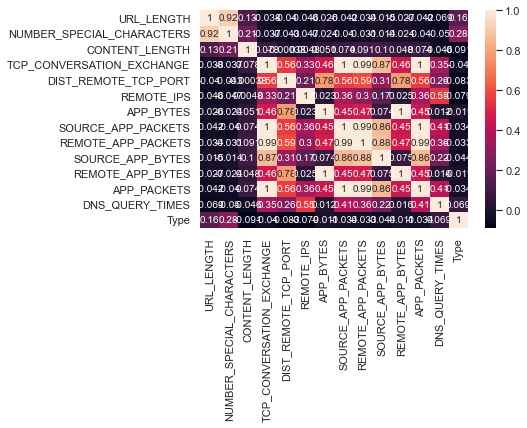

In [75]:
# Your code here
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(websites.corr(), annot = True )
sns.set(rc = {'figure.figsize':(20,8)})#<--responsible for changing the size of a seaborn plot
plt.show()

In [76]:
# Your comment here

Some of the variables pairs having a high correlation are the following:
- URL Length - Number of special characters
- Source app bytes - TCP conversation exchange
- Remote app packets - TCP conversation exchange
- App packets - TCP conversation exchange
- App packets - Source app packets
- Remote app packets - Source app packets
- Remote app packets - app packets
- Source app bytes - Source app packets
- Source app bytes - remote app packets
- App packets - source app bytes

# Challenge 2 - Remove Column Collinearity.

From the heatmap you created, you should have seen at least 3 columns that can be removed due to high collinearity. Remove these columns from the dataset.

Note that you should remove as few columns as you can. You don't have to remove all the columns at once. But instead, try removing one column, then produce the heatmap again to determine if additional columns should be removed. As long as the dataset no longer contains columns that are correlated for over 90%, you can stop. Also, keep in mind when two columns have high collinearity, you only need to remove one of them but not both.

In the cells below, remove as few columns as you can to eliminate the high collinearity in the dataset. Make sure to comment on your way so that the instructional team can learn about your thinking process which allows them to give feedback. At the end, print the heatmap again.

/var/folders/lr/stnkft6j5ps6pysrw7v0cgp80000gn/T/ipykernel_87645/1249064073.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(websites.corr(), annot = True )


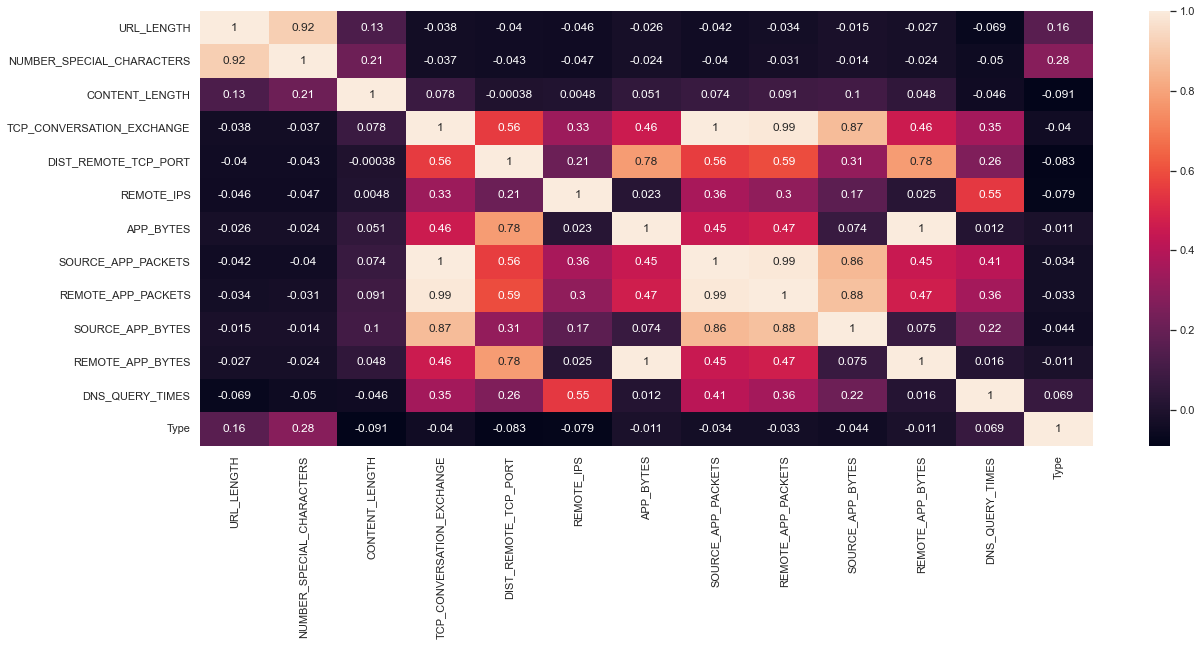

In [77]:
# Your code here
# First column -> APP_PACKETS:
websites.drop(['APP_PACKETS'], axis = 1, inplace = True)

# New heatmap:
sns.heatmap(websites.corr(), annot = True )
sns.set(rc = {'figure.figsize':(20,8)})#<--responsible for changing the size of a seaborn plot
plt.show()

/var/folders/lr/stnkft6j5ps6pysrw7v0cgp80000gn/T/ipykernel_87645/2764985243.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(websites.corr(), annot = True )


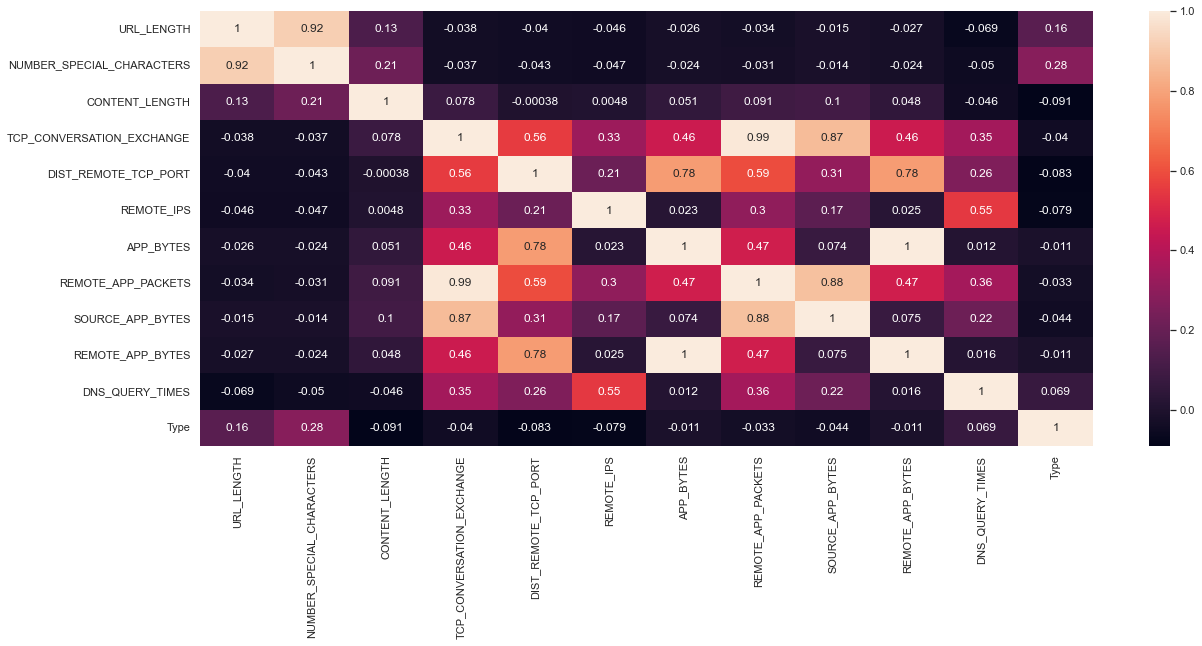

In [78]:
# Still high multicollinearity -> drop SOURCE_APP_PACKETS
websites.drop(['SOURCE_APP_PACKETS'], axis = 1, inplace = True)

sns.heatmap(websites.corr(), annot = True )
sns.set(rc = {'figure.figsize':(20,8)})#<--responsible for changing the size of a seaborn plot
plt.show()

In [79]:
# Still one to remove -> APP_BYTES
websites.drop(['APP_BYTES'], axis = 1, inplace = True)

/var/folders/lr/stnkft6j5ps6pysrw7v0cgp80000gn/T/ipykernel_87645/3295052621.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(websites.corr(), annot = True )


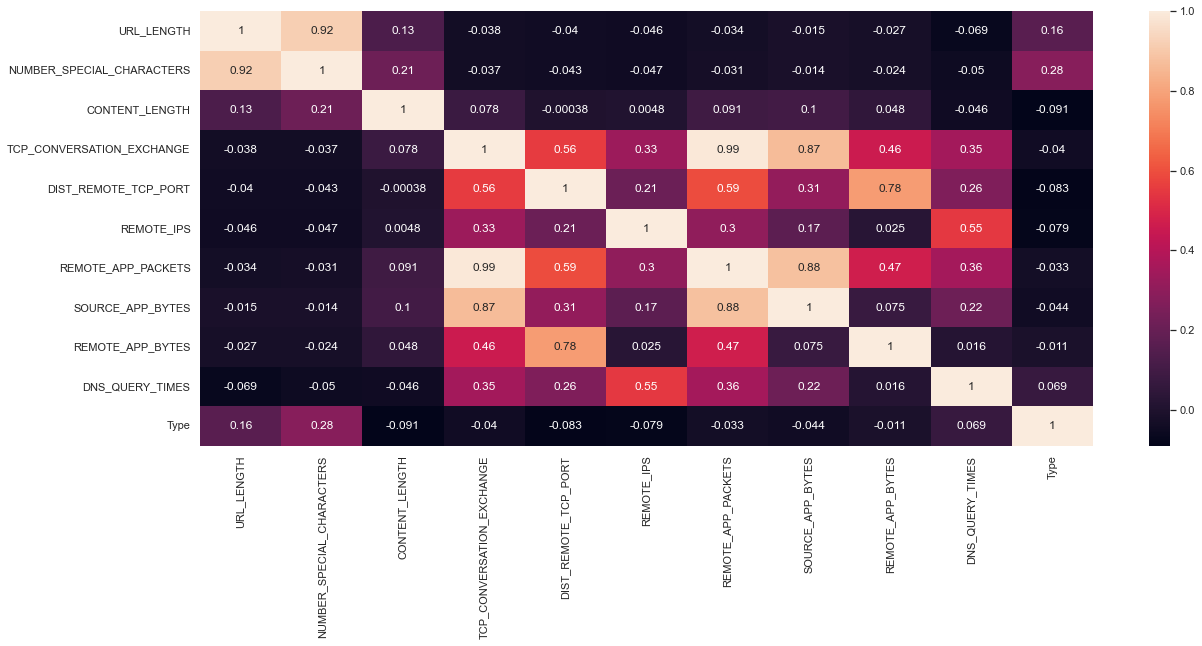

In [80]:
# Print heatmap again
sns.heatmap(websites.corr(), annot = True )
sns.set(rc = {'figure.figsize':(20,8)})#<--responsible for changing the size of a seaborn plot
plt.show()

In [81]:
# REMOTE_APP_PACKETS:
websites.drop(['REMOTE_APP_PACKETS'], axis = 1, inplace = True)

/var/folders/lr/stnkft6j5ps6pysrw7v0cgp80000gn/T/ipykernel_87645/3355973961.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(websites.corr(), annot = True )


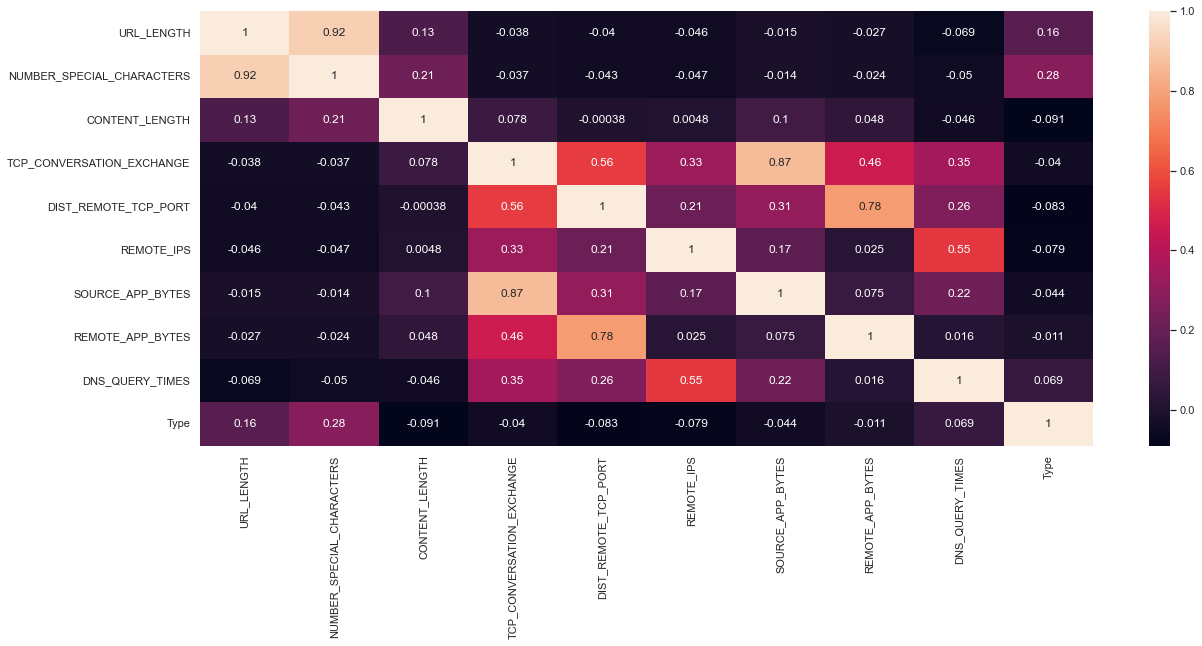

In [82]:
# Last plot:
sns.heatmap(websites.corr(), annot = True )
sns.set(rc = {'figure.figsize':(20,8)})#<--responsible for changing the size of a seaborn plot
plt.show()

Now we do not have any correlation between variables higher than 0.9, by removing only 4 columns. The dataset is in much better conditions to be fitted in a model.

# Challenge 3 - Handle Missing Values

The next step would be handling missing values. **We start by examining the number of missing values in each column, which you will do in the next cell.**

In [83]:
# Your code here
websites.isna().sum()

URL                            0
URL_LENGTH                     0
NUMBER_SPECIAL_CHARACTERS      0
CHARSET                        0
SERVER                         1
CONTENT_LENGTH               812
WHOIS_COUNTRY                  0
WHOIS_STATEPRO                 0
WHOIS_REGDATE                  0
WHOIS_UPDATED_DATE             0
TCP_CONVERSATION_EXCHANGE      0
DIST_REMOTE_TCP_PORT           0
REMOTE_IPS                     0
SOURCE_APP_BYTES               0
REMOTE_APP_BYTES               0
DNS_QUERY_TIMES                1
Type                           0
dtype: int64

If you remember in the previous labs, we drop a column if the column contains a high proportion of missing values. After dropping those problematic columns, we drop the rows with missing values.

#### In the cells below, handle the missing values from the dataset. Remember to comment the rationale of your decisions.

In [84]:
# Your code here
websites.drop(['CONTENT_LENGTH'], axis = 1, inplace = True)
websites.dropna(how = 'any', axis=0, inplace=True)

In [85]:
# Your comment here
# We have dropped the entire CONTENT_LENGTH COLUMN, which had plenty of missing values, and then, we dropped those rows
# having at least a missing value. With this two steps, most of the data is maintained and we got rid of NaNs.

#### Again, examine the number of missing values in each column. 

If all cleaned, proceed. Otherwise, go back and do more cleaning.

In [86]:
# Examine missing values in each column
# All clean, cool.
websites.isna().sum()

URL                          0
URL_LENGTH                   0
NUMBER_SPECIAL_CHARACTERS    0
CHARSET                      0
SERVER                       0
WHOIS_COUNTRY                0
WHOIS_STATEPRO               0
WHOIS_REGDATE                0
WHOIS_UPDATED_DATE           0
TCP_CONVERSATION_EXCHANGE    0
DIST_REMOTE_TCP_PORT         0
REMOTE_IPS                   0
SOURCE_APP_BYTES             0
REMOTE_APP_BYTES             0
DNS_QUERY_TIMES              0
Type                         0
dtype: int64

# Challenge 4 - Handle `WHOIS_*` Categorical Data

There are several categorical columns we need to handle. These columns are:

* `URL`
* `CHARSET`
* `SERVER`
* `WHOIS_COUNTRY`
* `WHOIS_STATEPRO`
* `WHOIS_REGDATE`
* `WHOIS_UPDATED_DATE`

How to handle string columns is always case by case. Let's start by working on `WHOIS_COUNTRY`. Your steps are:

1. List out the unique values of `WHOIS_COUNTRY`.
1. Consolidate the country values with consistent country codes. For example, the following values refer to the same country and should use consistent country code:
    * `CY` and `Cyprus`
    * `US` and `us`
    * `SE` and `se`
    * `GB`, `United Kingdom`, and `[u'GB'; u'UK']`

#### In the cells below, fix the country values as intructed above.

In [87]:
# Your code here
countries_handling = {'CY': 'Cyprus', 'US': 'us', 'SE': 'se', 'GB': 'United Kingdom', 'GB': "[u'GB'; u'UK']"}
new_countries = []

for country in websites.WHOIS_COUNTRY:
    if country in countries_handling.values():
        new_countries.append([key for key, value in countries_handling.items() if value == country][0])
    else:
        new_countries.append(country)

websites['WHOIS_COUNTRY'] = new_countries

Since we have fixed the country values, can we convert this column to ordinal now?

Not yet. If you reflect on the previous labs how we handle categorical columns, you probably remember we ended up dropping a lot of those columns because there are too many unique values. Too many unique values in a column is not desirable in machine learning because it makes prediction inaccurate. But there are workarounds under certain conditions. One of the fixable conditions is:

#### If a limited number of values account for the majority of data, we can retain these top values and re-label all other rare values.

The `WHOIS_COUNTRY` column happens to be this case. You can verify it by print a bar chart of the `value_counts` in the next cell to verify:

In [88]:
# Your code here
websites['WHOIS_COUNTRY'].value_counts()

US                1105
None               306
CA                  83
ES                  63
AU                  35
GB                  24
PA                  21
JP                  11
UK                  10
CN                  10
IN                  10
FR                   9
CZ                   9
NL                   6
CH                   6
KR                   5
AT                   4
PH                   4
SE                   4
BS                   4
ru                   4
TR                   3
HK                   3
BE                   3
DE                   3
KY                   3
SC                   3
UA                   2
BR                   2
CY                   2
UY                   2
KG                   2
NO                   2
RU                   2
IL                   2
SI                   2
LV                   1
United Kingdom       1
PK                   1
IT                   1
LU                   1
BY                   1
AE                   1
IE         

#### After verifying, now let's keep the top 10 values of the column and re-label other columns with `OTHER`.

In [89]:
# Your code here
top_10_countries = [val for val, cnt in websites.WHOIS_COUNTRY.value_counts()[:10].iteritems()]
relabel = []
for country in websites['WHOIS_COUNTRY']:
    if country not in top_10_countries:
        relabel.append('OTHER')
    else:
        relabel.append(country)
websites['WHOIS_COUNTRY'] = relabel
websites['WHOIS_COUNTRY'].value_counts()

/var/folders/lr/stnkft6j5ps6pysrw7v0cgp80000gn/T/ipykernel_87645/1578705429.py:2: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  top_10_countries = [val for val, cnt in websites.WHOIS_COUNTRY.value_counts()[:10].iteritems()]


US       1105
None      306
OTHER     111
CA         83
ES         63
AU         35
GB         24
PA         21
JP         11
UK         10
CN         10
Name: WHOIS_COUNTRY, dtype: int64

Now since `WHOIS_COUNTRY` has been re-labelled, we don't need `WHOIS_STATEPRO` any more because the values of the states or provinces may not be relevant any more. We'll drop this column.

In addition, we will also drop `WHOIS_REGDATE` and `WHOIS_UPDATED_DATE`. These are the registration and update dates of the website domains. Not of our concerns.

#### In the next cell, drop `['WHOIS_STATEPRO', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE']`.

In [90]:
# Your code here
websites.drop(['WHOIS_STATEPRO', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE'], axis=1, inplace=True)

# Challenge 5 - Handle Remaining Categorical Data & Convert to Ordinal

Now print the `dtypes` of the data again. Besides `WHOIS_COUNTRY` which we already fixed, there should be 3 categorical columns left: `URL`, `CHARSET`, and `SERVER`.

In [91]:
# Your code here
dtypes_list = []
for column in websites.columns:
    print(f'Column {column} contains {websites[column].dtypes} datatypes.')
    dtypes_list.append(websites[column].dtypes)

print(f"The data types present are the following: {set(dtypes_list)}.")

Column URL contains object datatypes.
Column URL_LENGTH contains int64 datatypes.
Column NUMBER_SPECIAL_CHARACTERS contains int64 datatypes.
Column CHARSET contains object datatypes.
Column SERVER contains object datatypes.
Column WHOIS_COUNTRY contains object datatypes.
Column TCP_CONVERSATION_EXCHANGE contains int64 datatypes.
Column DIST_REMOTE_TCP_PORT contains int64 datatypes.
Column REMOTE_IPS contains int64 datatypes.
Column SOURCE_APP_BYTES contains int64 datatypes.
Column REMOTE_APP_BYTES contains int64 datatypes.
Column DNS_QUERY_TIMES contains float64 datatypes.
Column Type contains int64 datatypes.
The data types present are the following: {dtype('float64'), dtype('O'), dtype('int64')}.


#### `URL` is easy. We'll simply drop it because it has too many unique values that there's no way for us to consolidate.

In [92]:
# Your code here
websites.drop(['URL'], axis=1, inplace=True)

#### Print the unique value counts of `CHARSET`. You see there are only a few unique values. So we can keep it as it is.

In [93]:
# Your code here
websites.CHARSET.value_counts()

UTF-8           674
ISO-8859-1      427
utf-8           379
us-ascii        155
iso-8859-1      134
None              7
windows-1251      1
ISO-8859          1
windows-1252      1
Name: CHARSET, dtype: int64

`SERVER` is a little more complicated. Print its unique values and think about how you can consolidate those values.

#### Before you think of your own solution, don't read the instructions that come next.

In [62]:
# Your code here
unique_servers = set([value for value in websites.SERVER])
unique_servers

# Those with ATS, Apache, openrest, etc. could be grouped under the general term.

{'.V01 Apache',
 '294',
 'ATS',
 'ATS/5.3.0',
 'Aeria Games & Entertainment',
 'AkamaiGHost',
 'AmazonS3',
 'Apache',
 'Apache-Coyote/1.1',
 'Apache/1.3.27 (Unix)  (Red-Hat/Linux) mod_perl/1.26 PHP/4.3.3 FrontPage/5.0.2 mod_ssl/2.8.12 OpenSSL/0.9.6b',
 'Apache/1.3.27 (Unix) PHP/4.4.1',
 'Apache/1.3.31 (Unix) PHP/4.3.9 mod_perl/1.29 rus/PL30.20',
 'Apache/1.3.33 (Unix) mod_ssl/2.8.24 OpenSSL/0.9.7e-p1 PHP/4.4.8',
 'Apache/1.3.34 (Unix) PHP/4.4.4',
 'Apache/1.3.37 (Unix) mod_perl/1.29 mod_ssl/2.8.28 OpenSSL/0.9.7e-p1',
 'Apache/1.3.39 (Unix) PHP/5.2.5 mod_auth_passthrough/1.8 mod_bwlimited/1.4 mod_log_bytes/1.2 mod_gzip/1.3.26.1a FrontPage/5.0.2.2635 DAV/1.0.3 mod_ssl/2.8.30 OpenSSL/0.9.7a',
 'Apache/1.3.42 Ben-SSL/1.60 (Unix) mod_gzip/1.3.26.1a mod_fastcgi/2.4.6 mod_throttle/3.1.2 Chili!Soft-ASP/3.6.2 FrontPage/5.0.2.2635 mod_perl/1.31 PHP/4.4.9',
 'Apache/2',
 'Apache/2.0.52 (Red Hat)',
 'Apache/2.0.63 (Unix) mod_ssl/2.0.63 OpenSSL/0.9.8e-fips-rhel5 mod_auth_passthrough/2.1 mod_bwlimit

Although there are so many unique values in the `SERVER` column, there are actually only 3 main server types: `Microsoft`, `Apache`, and `nginx`. Just check if each `SERVER` value contains any of those server types and re-label them. For `SERVER` values that don't contain any of those substrings, label with `Other`.

At the end, your `SERVER` column should only contain 4 unique values: `Microsoft`, `Apache`, `nginx`, and `Other`.

In [95]:
# Your code here
server_handler = []

for server in websites.SERVER:
    if 'Microsoft' in server:
        server_handler.append('Microsoft')
    elif 'Apache' in server:
        server_handler.append('Apache')
    elif 'nginx' in server:
        server_handler.append('nginx')
    else:
        server_handler.append('Other')

websites.SERVER = server_handler

In [96]:
# Count `SERVER` value counts here
websites['SERVER'].value_counts()

Apache       642
Other        504
nginx        435
Microsoft    198
Name: SERVER, dtype: int64

OK, all our categorical data are fixed now. **Let's convert them to ordinal data using Pandas' `get_dummies` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html)).** Make sure you drop the categorical columns by passing `drop_first=True` to `get_dummies` as we don't need them any more. **Also, assign the data with dummy values to a new variable `website_dummy`.**

In [106]:
# Your code here
website_dummy = pd.get_dummies(websites, columns=['SERVER'], drop_first=True)

Now, inspect `website_dummy` to make sure the data and types are intended - there shouldn't be any categorical columns at this point.

In [107]:
# Your code here
website_dummy

,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,WHOIS_COUNTRY,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,DNS_QUERY_TIMES,Type,SERVER_Microsoft,SERVER_Other,SERVER_nginx
0,16,7,iso-8859-1,None,7,0,2,1153,832,2.0,1,0,0,1
1,16,6,UTF-8,None,17,7,4,1265,1230,0.0,0,0,0,0
2,16,6,us-ascii,None,0,0,0,0,0,0.0,0,1,0,0
3,17,6,ISO-8859-1,US,31,22,3,18784,4380,8.0,0,0,0,1
4,17,6,UTF-8,US,57,2,5,129889,4586,4.0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1776,194,16,UTF-8,ES,0,0,0,186,0,0.0,1,0,0,0
1777,198,17,UTF-8,ES,0,0,0,124,0,0.0,1,0,0,0
1778,201,34,utf-8,US,83,2,6,132181,6945,4.0,0,0,0,0
1779,234,34,ISO-8859-1,US,0,0,0,0,0,0.0,0,0,0,1


# Challenge 6 - Modeling, Prediction, and Evaluation

We'll start off this section by splitting the data to train and test. **Name your 4 variables `X_train`, `X_test`, `y_train`, and `y_test`. Select 80% of the data for training and 20% for testing.**

In [111]:
website_dummy

,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,WHOIS_COUNTRY,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,DNS_QUERY_TIMES,Type,SERVER_Microsoft,SERVER_Other,SERVER_nginx
0,16,7,iso-8859-1,None,7,0,2,1153,832,2.0,1,0,0,1
1,16,6,UTF-8,None,17,7,4,1265,1230,0.0,0,0,0,0
2,16,6,us-ascii,None,0,0,0,0,0,0.0,0,1,0,0
3,17,6,ISO-8859-1,US,31,22,3,18784,4380,8.0,0,0,0,1
4,17,6,UTF-8,US,57,2,5,129889,4586,4.0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1776,194,16,UTF-8,ES,0,0,0,186,0,0.0,1,0,0,0
1777,198,17,UTF-8,ES,0,0,0,124,0,0.0,1,0,0,0
1778,201,34,utf-8,US,83,2,6,132181,6945,4.0,0,0,0,0
1779,234,34,ISO-8859-1,US,0,0,0,0,0,0.0,0,0,0,1


In [112]:
from sklearn.model_selection import train_test_split

# Your code here:
X = website_dummy.drop(['Type', 'CHARSET', 'WHOIS_COUNTRY'], axis=1, inplace=False)
y = website_dummy['Type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#### In this lab, we will try two different models and compare our results.

The first model we will use in this lab is logistic regression. We have previously learned about logistic regression as a classification algorithm. In the cell below, load `LogisticRegression` from scikit-learn and initialize the model.

In [113]:
# Your code here:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()

Next, fit the model to our training data. We have already separated our data into 4 parts. Use those in your model.

In [114]:
# Your code here:
model = log.fit(X_train, y_train)

/Users/gerardrius/opt/anaconda3/envs/ironhack/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


finally, import `confusion_matrix` and `accuracy_score` from `sklearn.metrics` and fit our testing data. Assign the fitted data to `y_pred` and print the confusion matrix as well as the accuracy score

In [3]:
# Your code here:



What are your thoughts on the performance of the model? Write your conclusions below.

In [4]:
# Your conclusions here:



#### Our second algorithm is is DecisionTreeClassifier

Though is it not required, we will fit a model using the training data and then test the performance of the model using the testing data. Start by loading `DecisionTreeClassifier` from scikit-learn and then initializing and fitting the model. We'll start off with a model where max_depth=3

In [5]:
# Your code here:



To test your model, compute the predicted probabilities, decide 0 or 1 using a threshold of 0.5 and print the confusion matrix as well as the accuracy score (on the test set!)

In [6]:
# Your code here:



#### We'll create another DecisionTreeClassifier model with max_depth=5. 
Initialize and fit the model below and print the confusion matrix and the accuracy score.

In [7]:
# Your code here:



Did you see an improvement in the confusion matrix when increasing max_depth to 5? Did you see an improvement in the accuracy score? Write your conclusions below.

In [8]:
# Your conclusions here:



# Bonus Challenge - Feature Scaling

Problem-solving in machine learning is iterative. You can improve your model prediction with various techniques (there is a sweetspot for the time you spend and the improvement you receive though). Now you've completed only one iteration of ML analysis. There are more iterations you can conduct to make improvements. In order to be able to do that, you will need deeper knowledge in statistics and master more data analysis techniques. In this bootcamp, we don't have time to achieve that advanced goal. But you will make constant efforts after the bootcamp to eventually get there.

However, now we do want you to learn one of the advanced techniques which is called *feature scaling*. The idea of feature scaling is to standardize/normalize the range of independent variables or features of the data. This can make the outliers more apparent so that you can remove them. This step needs to happen during Challenge 6 after you split the training and test data because you don't want to split the data again which makes it impossible to compare your results with and without feature scaling. For general concepts about feature scaling, click [here](https://en.wikipedia.org/wiki/Feature_scaling). To read deeper, click [here](https://medium.com/greyatom/why-how-and-when-to-scale-your-features-4b30ab09db5e).

In the next cell, attempt to improve your model prediction accuracy by means of feature scaling. A library you can utilize is `sklearn.preprocessing.RobustScaler` ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html)). You'll use the `RobustScaler` to fit and transform your `X_train`, then transform `X_test`. You will use logistic regression to fit and predict your transformed data and obtain the accuracy score in the same way. Compare the accuracy score with your normalized data with the previous accuracy data. Is there an improvement?

In [ ]:
# Your code here